In [ ]:
from keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from keras.applications.vgg16 import preprocess_input
from keras.utils import load_img, img_to_array
import numpy as np
import pandas as pd
import os
import pickle

from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
model = VGG16(weights='imagenet', include_top=True)
model = Model(inputs=model.input, outputs=model.get_layer('fc1').output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
images_path = 'Images/'
image_filename = os.listdir(images_path)

In [ ]:
features = {}
for image_name in image_filename:
    image_path = 'Images/' + image_name
    image = load_img(image_path, target_size=(224, 224))
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = preprocess_input(image)
    feature = model.predict(image, verbose=0)
    image_id = image_name.split('.')[0]
    features[image_id] = feature

In [ ]:
features_flatten = []
for i in features.keys():
    features_flatten.append(features[i].flatten())

In [ ]:
features_flatten

[array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0.      , 0.      , 0.      , ..., 0.      , 1.424864, 0.      ],
       dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
        25.990208], dtype=float32),
 array([ 0.      ,  0.      ,  0.      , ..., 12.691112,  0.      ,
        16.496252], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0.      , 0.      , 0.      , ..., 0.      , 6.434959, 0.      ],
       dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([ 0.      ,  0.      ,  0.      , ...,  0.      , 10.555971,
         0.      ], dtype=float32),
 array([0.        , 0.        , 0.        , ..., 0.        , 0

In [ ]:
len(features)

8091

In [ ]:
features

{'1000268201_693b08cb0e': array([[[[ 0.       ,  0.       ,  0.       , ...,  0.       ,
           15.234043 ,  0.       ],
          [ 0.       ,  0.       ,  0.       , ...,  0.       ,
            5.495257 ,  0.       ],
          [ 0.       ,  0.       ,  0.       , ...,  0.       ,
            0.       ,  0.       ],
          ...,
          [ 0.       ,  0.       ,  0.       , ...,  0.       ,
            4.1595883,  0.       ],
          [ 0.       ,  0.       ,  0.       , ...,  0.       ,
            2.8616538,  0.       ],
          [ 0.       ,  0.       ,  0.       , ...,  0.       ,
            1.8116479,  0.       ]],
 
         [[ 0.       ,  0.       ,  0.       , ...,  0.       ,
            0.       ,  0.       ],
          [ 0.       ,  0.       ,  0.       , ...,  0.       ,
            0.       ,  0.       ],
          [ 0.       ,  0.       ,  0.       , ...,  2.0015247,
            0.       ,  0.       ],
          ...,
          [ 0.       ,  0.       ,  0.    

In [ ]:
with open('features.pkl', 'wb') as f:
    pickle.dump(features, f)

In [ ]:
with open('features.pkl', 'rb') as f:
    features = pickle.load(f)

In [ ]:
captions = {}
with open("Flickr_TextData/Flickr8k.token.txt", "r") as file:
    lines = file.readlines()
    for line in lines:
        image_name, comment = line.strip().split("\t")
        image_id = image_name.split(".")[0]
        if image_id not in captions:
            captions[image_id] = []
        captions[image_id].append(comment)

In [ ]:
len(captions)

8092

In [ ]:
for key in captions.keys():
    if key not in features.keys():
        value_to_remove = key

In [ ]:
value_to_remove

'2258277193_586949ec62'

In [ ]:
del captions['2258277193_586949ec62']

In [ ]:
import string
def clean_captions(captions):
    for key in captions.keys():
        for i, caption in enumerate(captions[key]):
            table = str.maketrans('', '', string.punctuation)
            caption = caption.translate(table)
            caption = [word.lower() for word in caption.split()]
            caption = ' '.join(caption)
            caption = caption.replace("-", " ")
            caption = caption.replace('[^A-Za-z]', '')
            caption = caption.replace('\s+', ' ')
            caption = 'startseq ' + ' '.join([word for word in caption.split() if len(word)>1]) + ' endseq'
            captions[key][i] = caption
    return captions

In [ ]:
clean_captions(captions)

{'1000268201_693b08cb0e': ['startseq child in pink dress is climbing up set of stairs in an entry way endseq',
  'startseq girl going into wooden building endseq',
  'startseq little girl climbing into wooden playhouse endseq',
  'startseq little girl climbing the stairs to her playhouse endseq',
  'startseq little girl in pink dress going into wooden cabin endseq'],
 '1001773457_577c3a7d70': ['startseq black dog and spotted dog are fighting endseq',
  'startseq black dog and tricolored dog playing with each other on the road endseq',
  'startseq black dog and white dog with brown spots are staring at each other in the street endseq',
  'startseq two dogs of different breeds looking at each other on the road endseq',
  'startseq two dogs on pavement moving toward each other endseq'],
 '1002674143_1b742ab4b8': ['startseq little girl covered in paint sits in front of painted rainbow with her hands in bowl endseq',
  'startseq little girl is sitting in front of large painted rainbow endse

In [ ]:
captions_list = []
for key in captions.keys():
    for caption in captions[key]:
        captions_list.append(caption)

In [ ]:
len(captions_list)

40455

In [ ]:
captions_list

['startseq child in pink dress is climbing up set of stairs in an entry way endseq',
 'startseq girl going into wooden building endseq',
 'startseq little girl climbing into wooden playhouse endseq',
 'startseq little girl climbing the stairs to her playhouse endseq',
 'startseq little girl in pink dress going into wooden cabin endseq',
 'startseq black dog and spotted dog are fighting endseq',
 'startseq black dog and tricolored dog playing with each other on the road endseq',
 'startseq black dog and white dog with brown spots are staring at each other in the street endseq',
 'startseq two dogs of different breeds looking at each other on the road endseq',
 'startseq two dogs on pavement moving toward each other endseq',
 'startseq little girl covered in paint sits in front of painted rainbow with her hands in bowl endseq',
 'startseq little girl is sitting in front of large painted rainbow endseq',
 'startseq small girl in the grass plays with fingerpaints in front of white canvas w

In [ ]:
features_list = []
for key in captions.keys():
    if key in features[key]:
        features_list.append(i.flatten())

C:\Users\lenovo\AppData\Local\Temp\ipykernel_20260\2397749708.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if key in features[key]:


In [ ]:
features_list

[]

In [ ]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding
from tensorflow.keras.utils import to_categorical, plot_model

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(captions_list)

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

8811


In [ ]:
max_length = max(len(caption.split()) for caption in captions_list)
print(max_length)

34


In [ ]:
image_ids = list(captions.keys())
split = int(len(image_ids) * 0.90)
train = image_ids[:split]
test = image_ids[split:]

In [ ]:
def data_generator(data, tokenizer, mapping, features, max_length, vocab_size, batch_size):
    while True:
        X1, X2, y = [], [], []
        for i in range(batch_size):
            key = data[np.random.randint(0, len(data))]
            captions = mapping[key]
            caption = captions[np.random.randint(0, len(captions))]
            seq = tokenizer.texts_to_sequences([caption])[0]
            for j in range(1, len(seq)):
                in_seq, out_seq = seq[:j], seq[j]
                in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
                out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
                X1.append(features[key][0])
                X2.append(in_seq)
                y.append(out_seq)
        yield [np.array(X1), np.array(X2)], np.array(y)
        del X1, X2, y

In [ ]:
epochs = 20
batch_size = 32
steps = len(train) // batch_size
for i, j in data_generator(train, tokenizer, captions, features, max_length, vocab_size, batch_size):
    print(len(i[0]), i[0].shape, len(i[1]), i[1].shape, len(j), j.shape)

1746 (1746, 4096) 1746 (1746, 34) 1746 (1746, 8811)
1656 (1656, 4096) 1656 (1656, 34) 1656 (1656, 8811)
1573 (1573, 4096) 1573 (1573, 34) 1573 (1573, 8811)
1654 (1654, 4096) 1654 (1654, 34) 1654 (1654, 8811)
1677 (1677, 4096) 1677 (1677, 34) 1677 (1677, 8811)
1579 (1579, 4096) 1579 (1579, 34) 1579 (1579, 8811)
1737 (1737, 4096) 1737 (1737, 34) 1737 (1737, 8811)
1669 (1669, 4096) 1669 (1669, 34) 1669 (1669, 8811)
1727 (1727, 4096) 1727 (1727, 34) 1727 (1727, 8811)
1754 (1754, 4096) 1754 (1754, 34) 1754 (1754, 8811)
1620 (1620, 4096) 1620 (1620, 34) 1620 (1620, 8811)
1713 (1713, 4096) 1713 (1713, 34) 1713 (1713, 8811)
1713 (1713, 4096) 1713 (1713, 34) 1713 (1713, 8811)
1680 (1680, 4096) 1680 (1680, 34) 1680 (1680, 8811)
1571 (1571, 4096) 1571 (1571, 34) 1571 (1571, 8811)
1620 (1620, 4096) 1620 (1620, 34) 1620 (1620, 8811)
1610 (1610, 4096) 1610 (1610, 34) 1610 (1610, 8811)
1624 (1624, 4096) 1624 (1624, 34) 1624 (1624, 8811)
1695 (1695, 4096) 1695 (1695, 34) 1695 (1695, 8811)
1582 (1582, 

KeyboardInterrupt: 

In [ ]:
import os
import pickle
import numpy as np
from tqdm.notebook import tqdm

from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout, add

In [ ]:
inputs1 = Input(shape=(4096,))
fe1 = Dropout(0.4)(inputs1)
fe2 = Dense(256, activation='relu')(inputs1)

inputs2 = Input(shape=(max_length,))
se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
se2 = Dropout(0.4)(se1)
se3 = LSTM(256)(se2)

decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)

model = Model(inputs=[inputs1, inputs2], outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 34)]         0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, 34, 256)      2255616     ['input_4[0][0]']                
                                                                                                  
 input_3 (InputLayer)           [(None, 4096)]       0           []                               
                                                                                                  
 dropout_3 (Dropout)            (None, 34, 256)      0           ['embedding_1[0][0]']            
                                                                                            

In [ ]:
epochs = 15
batch_size = 64
steps = len(train) // batch_size

for i in range(epochs):
    generator = data_generator(train, tokenizer, captions, features, max_length, vocab_size, batch_size)
    model.fit(generator, epochs=1, steps_per_epoch=steps, verbose=1)

  5/113 [>.............................] - ETA: 10:41 - loss: 7.7335

In [ ]:
def idx_to_word(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

In [ ]:
def generate_caption(image_name):
    image_id = image_name.split('.')[0]
    img_path = os.path.join("Images/", image_name)
    image = Image.open(img_path)
    captions_ = captions[image_id]
    print('---------------------Actual---------------------')
    for caption in captions_:
        print(caption)
    y_pred = predict_caption(model, features[image_id], tokenizer, max_length)
    print('--------------------Predicted--------------------')
    print(y_pred)
    plt.imshow(image)

---------------------Actual---------------------
startseq black dog and spotted dog are fighting endseq
startseq black dog and tricolored dog playing with each other on the road endseq
startseq black dog and white dog with brown spots are staring at each other in the street endseq
startseq two dogs of different breeds looking at each other on the road endseq
startseq two dogs on pavement moving toward each other endseq
--------------------Predicted--------------------
startseq two dogs are playing with each other endseq


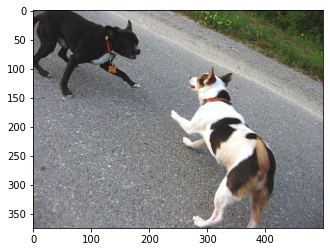

In [ ]:
generate_caption("1001773457_577c3a7d70.jpg")